# D6 Recreating  W E B Du Bois Visualisation
---
### Thirty days of Data Visualisations
JWriggy

Inspired by a [challenge](https://github.com/ajstarks/dubois-data-portraits/tree/master/challenge) to recreate some of Du Bois's classic visualisations.

Comparing numbers on different scales - a novel stacked bar chart.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

plt.style.use('db.mplstyle')

In [2]:
# The Data
df = pd.read_csv('data/Dubois6.csv')
df

,Category,Population
0,Cities Over 10000,78139
1,Cities 5000-10000,8025
2,Cities 2500-5000,37699
3,Country and Villages,734952


In [3]:
# scale data 0 - 100
zz = df['Population']*100/max(df['Population'])
zz

0     10.631851
1      1.091908
2      5.129451
3    100.000000
Name: Population, dtype: float64

In [4]:
# text
title = 'CITY AND RURAL POPULATION.\n1890.'

# style
colors = ['#669966','#4682b4', '#ffd700','#dc143c']  
ec = '#666666'
h2 = {'fontsize': 10, 'alpha': 0.6,  'ha':'center', 'va':'center'}

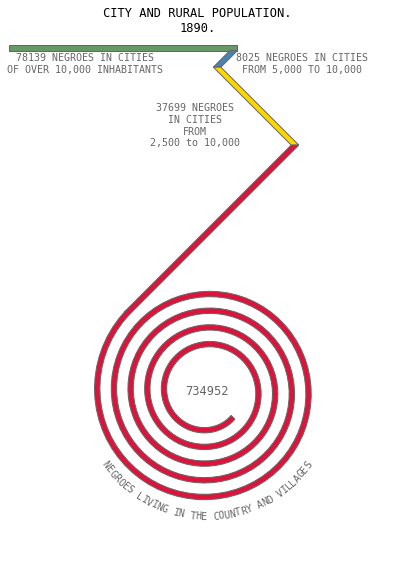

In [5]:
fig,ax = plt.subplots(figsize=(6,8))
ax.set_frame_on(False)
ax.tick_params(labelleft=False,labelbottom=False )

# Data zz is scaled 0 - 100
xmax,ymax = 18,24
ax.set_xlim(0,xmax)
ax.set_ylim(0,ymax)
ax.axes.set_aspect('equal')
# scale factor for sections angled at 45 deg
f = np.cos(np.pi/4)

# plot 
dt = .25 # thickness of bar
dxy = dt/f # for angled secition

# bottom rh corner of bars
x1,y1 = zz[0],ymax-dt 
x2,y2 = x1 - zz[1]*f, y1 - zz[1]*f
x3,y3 = x2 + zz[2]*f, y2 - zz[2]*f
bar4len = 11 # length of bar connected to spiral
x4,y4 = x3- bar4len*f, y3 - bar4len*f

bar1 = [(x1,y1),(0,y1),(0,y1+dt),(x1,y1+dt),(x1,y1)]
bar2 = [(x2,y2),(x2-dxy,y2),(x1-dxy,y1),(x1,y1),(x2,y2)]
bar3 = [(x3,y3),(x3-dxy,y3),(x2-dxy,y2),(x2,y2),(x3,y3)]
bar4 = [(x4-dxy,y4),(x3-dxy,y3),(x3,y3),(x4,y4)]
for i,bar in enumerate([bar1,bar2,bar3]):
        ax.add_patch(Polygon(bar, facecolor=colors[i], edgecolor=ec))
        
# spiral connected to bar4
spiralLen = zz[3] - bar4len
# spiral - use n=4.5 revolutions, inner rad r0,'thickness' h 
n,h = 4.5, .75 
# Spiral length is roughly 2*pi*n(r0 + h*3.5/2)
theta0 = .75*np.pi
r0 = (spiralLen/(np.pi*n*2)) - h*(n-1)/2 
r1 = r0 + n*h # avg outer radius of spiral
numpts = 300
theta = np.linspace(n*2*np.pi+theta0,theta0, numpts) # clockwise
# spiral centre
centrex, centrey = x4-dxy/2 + r1*f, y4-r1*f
# inner spiral pts
r1i = r0 + n*h - dt/2
r = np.linspace(r0-dt, r1i, numpts)
xis, yis = r*np.cos(theta) + centrex, r*np.sin(theta) + centrey
# outer spiral pts
r1o = r0 + n*h +dt/2
r = np.linspace(r0, r1o, numpts)
xos, yos = r*np.cos(theta) + centrex, r*np.sin(theta) + centrey
verts = bar4 + list(zip(np.concatenate([np.flip(xis), xos]), np.concatenate([np.flip(yis), yos])))
ax.add_patch(Polygon(verts, facecolor=colors[3], edgecolor=ec))

# annotation
ax.text(x1/3,y1-2.5*dt,str(df.loc[0,'Population'])+' NEGROES IN CITIES\nOF OVER 10,000 INHABITANTS', fontdict=h2)
ax.text(x1+3,y1-2.5*dt,str(df.loc[1,'Population'])+' NEGROES IN CITIES\nFROM 5,000 TO 10,000', fontdict=h2)
ax.text(x1-2,y1-3.5,str(df.loc[2,'Population'])+' NEGROES\nIN CITIES\nFROM\n2,500 to 10,000', fontdict=h2)
ax.text(centrex,centrey, df.loc[3,'Population'], fontdict=h2, fontsize=12)
# curved text
txt = 'NEGROES LIVING IN THE COUNTRY AND VILLAGES'
thetatxt = np.linspace(-.8*np.pi,-0.2*np.pi,len(txt))
xs = (r1o+.5)*np.cos(thetatxt) + centrex
ys = (r1o+.5)*np.sin(thetatxt) + centrey
for i,char in enumerate(txt):
    ax.text(xs[i],ys[i],char, fontdict=h2,rotation=90+(thetatxt[i]*180)/np.pi)
    
fig.suptitle(title, fontsize=12, ha='center')
plt.tight_layout()
plt.savefig("vis/D6_duBois6.png")
plt.show()